## Emotion AI Start

In [56]:
#mount the drive on collab. Load the data onto your drive first tho
from google.colab import drive
drive.mount('content')

Mounted at content


#### Imports

In [59]:
%cd content/My Drive/Project_emotion

/content/content/My Drive/Project_emotion


In [2]:
import numpy as np
import pandas as pd
import os
import io
import PIL
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

Saving data.csv to data.csv


In [60]:
df_keypoints= pd.read_csv('data.csv')

In [5]:
df_keypoints.head(2)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...


In [6]:
df_keypoints.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,22.361617,38.034571,56.147991,29.222304,79.617523,29.656570,39.272084,29.413747,15.761707,30.452947,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,2.768804,2.654903,2.819914,2.867131,3.312647,3.627187,2.609648,2.842219,3.337901,3.644342,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,11.054589,26.521633,35.581733,15.859361,55.549929,10.522325,25.060327,16.476000,3.826243,13.224453,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,20.631964,36.569765,54.562757,27.590944,77.732395,27.658656,37.555192,27.798773,13.540535,28.268263,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,22.529600,37.876900,56.239984,29.468466,79.797607,29.753523,39.247681,29.528098,15.760876,30.333323,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,24.202338,39.401034,57.926361,31.079433,81.559651,31.763791,40.824154,31.134740,17.871569,32.661300,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,40.050971,50.002113,67.752000,40.293408,94.269957,48.823425,51.300571,39.445859,39.676082,44.857962,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


In [7]:
df_keypoints.shape
#30 feature colunms (x and y co-ordinate) and last column has image pixels

(2140, 31)

In [8]:
df_keypoints.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [9]:
df_keypoints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [10]:
#Image column has image pixel values.
df_keypoints['Image']
df_keypoints['Image'].shape

(2140,)

In [11]:
type(df_keypoints['Image'][0])
#The values are in a string

str

In [12]:
#Change the pixel values into string and into a 2-D array.
df_keypoints['Image']= df_keypoints['Image'].apply(lambda x: list(map(int,x.split(' '))))
#Images from this dataset are 96X96
df_keypoints['Image']=df_keypoints['Image'].apply(lambda x: np.reshape(x,(96,96)))
df_keypoints['Image'][0].shape

(96, 96)

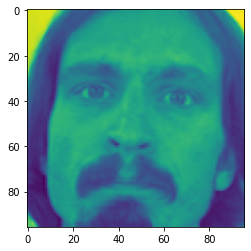

In [13]:
#showing an image
plt.imshow(df_keypoints['Image'][0])

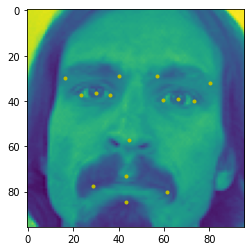

In [14]:
#overlaying keypoints on the face image

plt.imshow(df_keypoints['Image'][0])
for j in range(1,30,2):
    plt.plot(df_keypoints.loc[0][j-1],df_keypoints.loc[0][j],'y.')

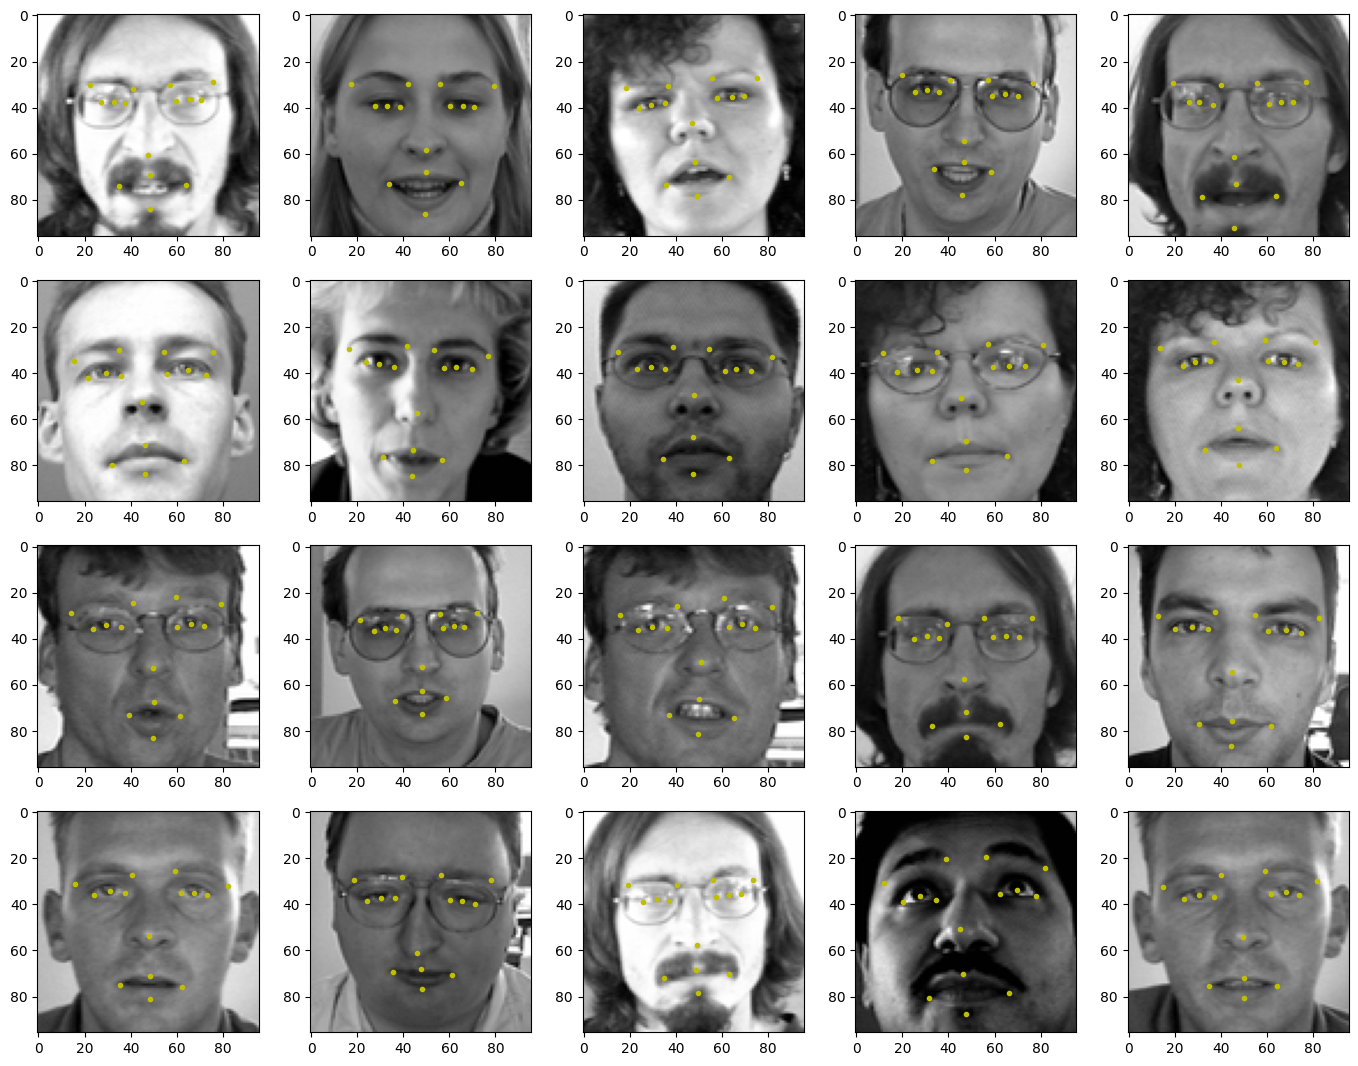

In [15]:
#printing 20 random images from datasets to check

fig =plt.figure(figsize=(17,17),dpi=100) #initializing the figure
for i in range(20):
    k=np.random.randint(1,300) #to get random images, k indexes the rows
    ax= fig.add_subplot(5,5,i+1) #5,5 is importnt cuz the size
    plt.imshow(df_keypoints['Image'][k],cmap='gray')
    
    for j in range(1,30,2):
        plt.plot(df_keypoints.loc[k][j-1],df_keypoints.loc[k][j],'y.')    #j takes x(even) and y(odd) for each feature

### Image Augmentation
##### Since keypoints need to overlay exaclty on each image, I don't use ImageDataGen

## DO Image aug as a generator after train-test split


In [16]:
#copy of orignal dataset
df_keypoints_copy=df_keypoints.copy(deep=True)

In [17]:
#flipping images vertically
df_keypoints_copy['Image']=df_keypoints_copy['Image'].apply(lambda x: np.flip(x,axis=1))

cols= df_keypoints_copy.columns[:-1]

In [18]:
#changing x-coordinates to overlay facepoints
for i in range(len(cols)):
    if i%2 == 0:
        df_keypoints_copy[cols[i]] = df_keypoints_copy[cols[i]].apply(lambda x: 96. - float(x) )
    

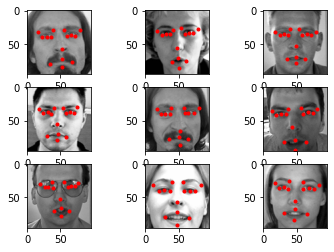

In [19]:
fig= plt.figure()
for i in range(9):
    ax=fig.add_subplot(3,3,i+1)
    plt.imshow(df_keypoints_copy['Image'][i],cmap='gray')
    
    for j in range(1,31,2):
        plt.plot(df_keypoints_copy.loc[i][j-1],df_keypoints_copy.loc[i][j],'r.')
    

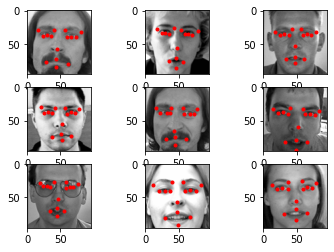

In [20]:
fig= plt.figure()
for i in range(9):
    ax=fig.add_subplot(3,3,i+1)
    plt.imshow(df_keypoints['Image'][i],cmap='gray')
    
    for j in range(1,31,2):
        plt.plot(df_keypoints.loc[i][j-1],df_keypoints.loc[i][j],'r.')
    

In [21]:
#adding augmented images to dataset
df_aug_keypoints=pd.concat([df_keypoints,df_keypoints_copy],axis=0)

In [22]:
df_aug_keypoints.shape

(4280, 31)

In [23]:
#flipping images vertically
df_keypoints_copy['Image']=df_keypoints_copy['Image'].apply(lambda x: np.flip(x,axis=0))

In [24]:
#changing y-coordinates to overlay facepoints
for i in range(len(cols)):
    if i%2 != 0:
        df_keypoints_copy[cols[i]] = df_keypoints_copy[cols[i]].apply(lambda x: 96. - float(x) )

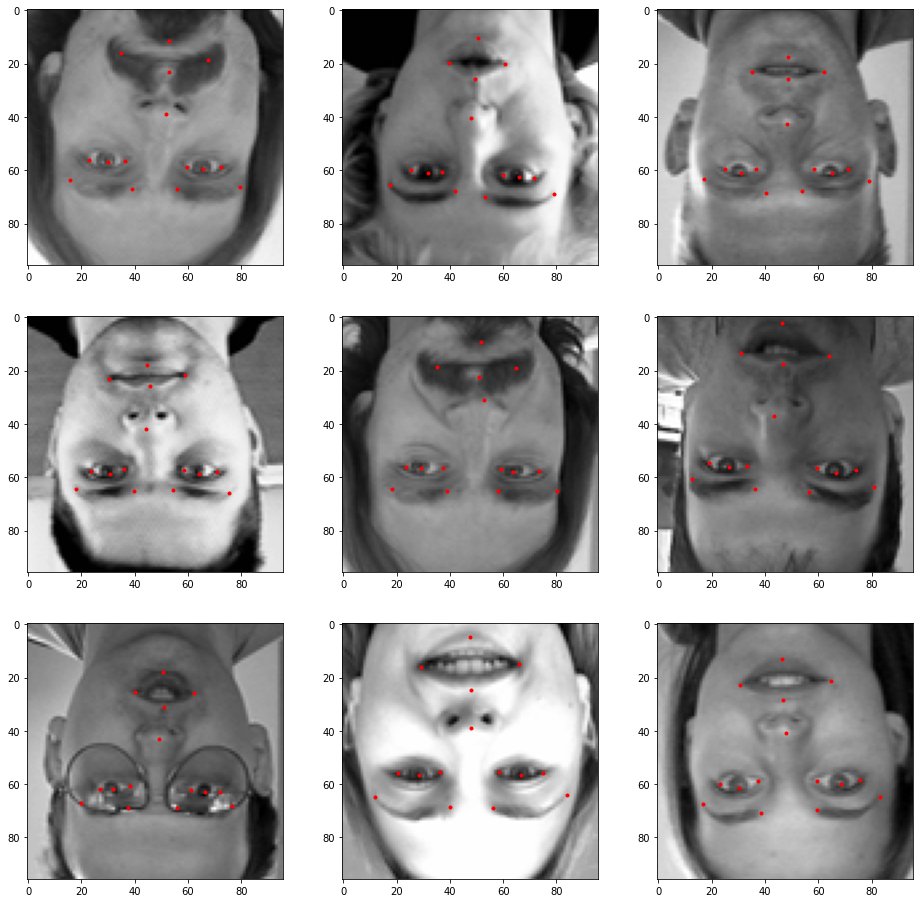

In [25]:
fig= plt.figure(figsize=(16,16))
for i in range(9):
    ax=fig.add_subplot(3,3,i+1)
    plt.imshow(df_keypoints_copy['Image'][i],cmap='gray')
    
    for j in range(1,31,2):
        plt.plot(df_keypoints_copy.loc[i][j-1],df_keypoints_copy.loc[i][j],'r.')
    

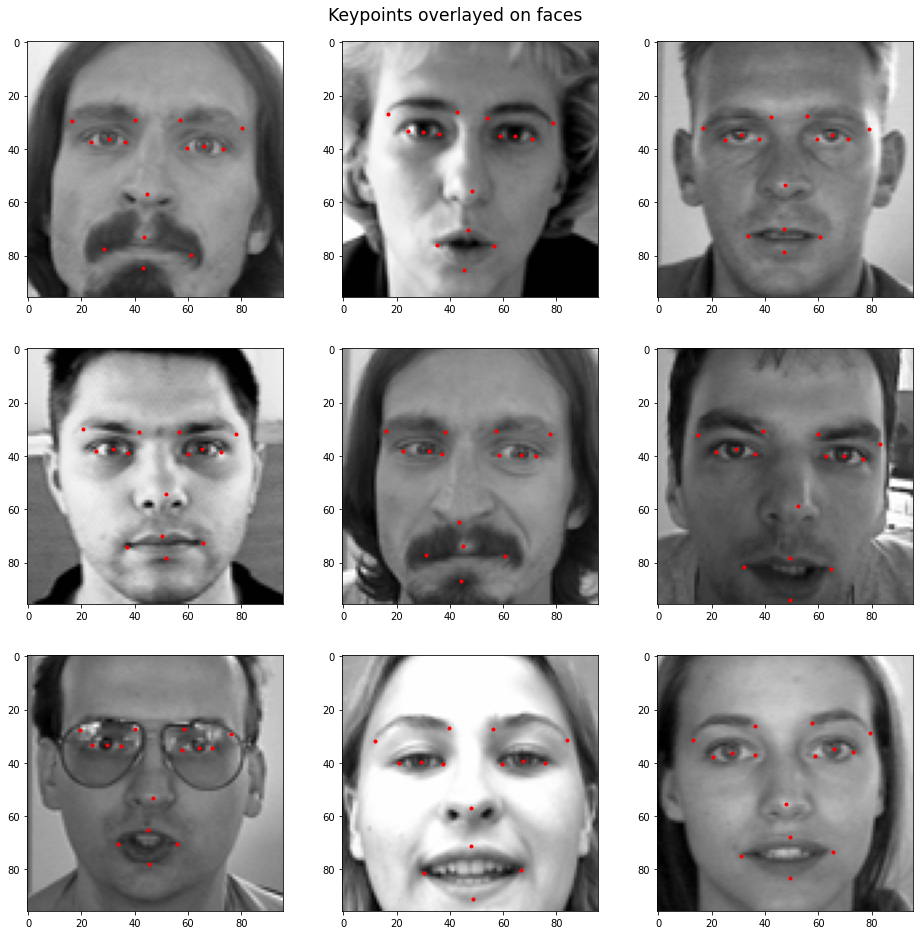

In [26]:
fig= plt.figure(figsize=(16,16))
for i in range(9):
    ax=fig.add_subplot(3,3,i+1)
    plt.imshow(df_keypoints['Image'][i],cmap='gray')
    plt.suptitle("Keypoints overlayed on faces",y=0.91,fontsize="xx-large")
    for j in range(1,31,2):
        plt.plot(df_keypoints.loc[i][j-1],df_keypoints.loc[i][j],'r.')
    

In [27]:
#adding these to final dataset
df_aug_keypoints=pd.concat([df_aug_keypoints,df_keypoints],axis=0)

In [28]:
df_aug_keypoints.shape

(6420, 31)

In [29]:
#changing value of pixels and clipping (brightening)
df_keypoints_copy = df_keypoints.copy(deep=True) 
df_keypoints_copy['Image'] = df_keypoints_copy['Image'].apply(lambda x:np.clip(np.random.uniform(1.5, 2)* x, 0.0, 255.0))
df_aug_keypoints = np.concatenate((df_aug_keypoints, df_keypoints_copy))
df_aug_keypoints.shape

(8560, 31)

## Train Test split and Normalization

In [30]:
images=df_aug_keypoints[:,30]

In [31]:
# Normalize the images
images = images/255.

# Create an empty array of shape (x, 96, 96, 1) to feed the model
X = np.empty((len(images), 96, 96, 1))

# Iterate through the img list and add image values to the empty array after expanding it's dimension from (96, 96) to (96, 96, 1)
for i in range(len(images)):
    X[i,] = np.expand_dims(images[i], axis = 2)

# Convert the array type to float32
X = np.asarray(X).astype(np.float32)
X.shape

(8560, 96, 96, 1)

In [32]:
y=df_aug_keypoints[:,:30]
y=np.asarray(y).astype(np.float32)

In [33]:
y.shape

(8560, 30)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=102)

In [35]:
print(X_train.shape)
print(X_test.shape)

(7276, 96, 96, 1)
(1284, 96, 96, 1)


### Building the DL model

In [36]:
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import *
from tensorflow.keras.initializers import glorot_uniform


In [38]:
def res_block(X, filter, stage):
    
    # Convolutional_block
    X_copy = X

    f1, f2, f3 = filter

    # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = MaxPool2D((2,2))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


    # Short path
    X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
    X_copy = MaxPool2D((2,2))(X_copy)
    X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    # Identity Block 1
    X_copy = X


    # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    return X
    

  

In [73]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - stage
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - stage
X = res_block(X, filter= [64,64,256], stage= 2)

# 3 - stage

X = res_block(X, filter= [128,128,512], stage= 3)


# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(30, activation = 'relu')(X)


keypoints_model = Model( inputs= X_input, outputs = X)
keypoints_model.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 102, 102, 1)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
_______________________________________________________________________________________

In [74]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
adam_op= Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
keypoints_model.compile(loss = "mean_squared_error", optimizer = adam_op , metrics = ['accuracy'])

In [91]:
early_stop= EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

history=keypoints_model.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_split = 0.2, callbacks=[early_stop])

Epoch 1/100
182/182 [==============================] - 3s 18ms/step - loss: 7.7733 - accuracy: 0.7686 - val_loss: 40.4891 - val_accuracy: 0.7424
Epoch 2/100
182/182 [==============================] - 3s 17ms/step - loss: 6.1711 - accuracy: 0.7814 - val_loss: 21.7246 - val_accuracy: 0.7734
Epoch 3/100
182/182 [==============================] - 3s 17ms/step - loss: 5.4095 - accuracy: 0.7873 - val_loss: 20.8232 - val_accuracy: 0.7514
Epoch 4/100
182/182 [==============================] - 3s 17ms/step - loss: 5.0424 - accuracy: 0.7883 - val_loss: 17.4566 - val_accuracy: 0.7740
Epoch 5/100
182/182 [==============================] - 3s 17ms/step - loss: 4.8504 - accuracy: 0.7830 - val_loss: 20.0491 - val_accuracy: 0.7692
Epoch 6/100
182/182 [==============================] - 3s 17ms/step - loss: 4.9672 - accuracy: 0.7904 - val_loss: 17.3147 - val_accuracy: 0.7802
Epoch 7/100
182/182 [==============================] - 3s 17ms/step - loss: 4.4586 - accuracy: 0.7986 - val_loss: 17.9957 - val_ac

In [104]:
predictions=keypoints_model.evaluate(X_test,y_test)

41/41 [==============================] - 0s 7ms/step - loss: 38.6261 - accuracy: 0.7858


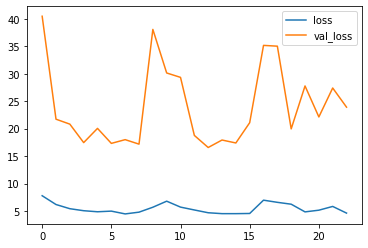

In [107]:
#make the graphs better before using fo rreadme
model_hist_df=pd.DataFrame(history.history)
model_hist_df[['loss','val_loss']].plot()

In [96]:
from tensorflow.keras.models import load_model
keypoints_model.save('keypoints_model.h5')

In [97]:
model_json = keypoints_model.to_json()
with open("keypoints_model.json","w") as json_file:
  json_file.write(model_json)